In [2]:
import numpy as np
import pandas as pd

data_path = './bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv') # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

In [3]:
train.shape, test.shape # 훈련데이터는 10886 행 , 12열 , 테스트데이터는 6493행 9열

((10886, 12), (6493, 9))

In [4]:
train.head() # count는 타깃값(종속변수) ==> 예측해야할 값

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head() # casual, registered 열이 존재 x ==> 훈련데이터에서 이 2개 열 삭제 시킨다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission.head() # id값 , datetime은 데이터를 구분하는 역할만 하므로 타깃값 예측하는 데 도움 주지 않는다.

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


### 피처엔지니어링 : datetime 피처의 데이터 타입은 object이다. 이를 시각화하기 위하여 적합하게 변환해야한다.

In [7]:
print(train['datetime'][100]) # datetime 100번째 원소
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [8]:
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[0].split('-')) # '-' 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split('-')[0]) # 2011
print(train['datetime'][100].split()[0].split('-')[1]) # 01
print(train['datetime'][100].split()[0].split('-')[2]) # 05

2011-01-05
['2011', '01', '05']
2011
01
05


In [9]:
print(train['datetime'][100].split()[1]) # 시간
print(train['datetime'][100].split()[1].split(':')) # 시간 분 초 리스트화
print(train['datetime'][100].split()[1].split(':')[0]) # 09
print(train['datetime'][100].split()[1].split(':')[1]) # 00
print(train['datetime'][100].split()[1].split(':')[2]) # 00

09:00:00
['09', '00', '00']
09
00
00


In [10]:
train['date'] = train['datetime'].apply(lambda x : x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일 , 시 , 분 , 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x :x.split()[0].split('-')[0]) # 연
train['month'] = train['datetime'].apply(lambda x :x.split()[0].split('-')[1]) #월
train['day'] = train['datetime'].apply(lambda x :x.split()[0].split('-')[2]) # 일
train['hour'] = train['datetime'].apply(lambda x :x.split()[1].split(':')[0]) # 시간
train['minute'] = train['datetime'].apply(lambda x :x.split()[1].split(':')[1]) # 분
train['second'] = train['datetime'].apply(lambda x :x.split()[1].split(':')[2]) # 초


In [11]:
train['date']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: date, Length: 10886, dtype: object

In [12]:
from datetime import datetime
import calendar

print(train['date'][100]) # 날짜

print(datetime.strptime(train['date'][100] , '%Y-%m-%d')) # datetime 타입으로 변경
# 정수로 요일 변환
print(datetime.strptime(train['date'][100] , '%Y-%m-%d').weekday())
# 문자열로 요일 변환
print(calendar.day_name[datetime.strptime(train['date'][100] , '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [13]:
train['weekday'] = train['date'].apply(lambda dateString : calendar.day_name[datetime.strptime(dateString , '%Y-%m-%d').weekday()])

train['weekday']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: weekday, Length: 10886, dtype: object

train['season']

In [14]:
train['season'] = train['season'].map({1 : 'Spring' , 2: 'Summer' , 3:'Fall' , 4:'Winter'})

train['weather'] = train['weather'].map({1 : 'Clear' , 2 : 'Mist , Few clouds' , 3: 'Light Snow , Rain , Thunderstorm' , 4 : 'Heavy Rain , Thunderstorm , Snow , Fog'})

train[['season' , 'weather']]

,season,weather
0,Spring,Clear
1,Spring,Clear
2,Spring,Clear
3,Spring,Clear
4,Spring,Clear
...,...,...
10881,Winter,Clear
10882,Winter,Clear
10883,Winter,Clear
10884,Winter,Clear


In [15]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


### 데이터 시각화

In [16]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


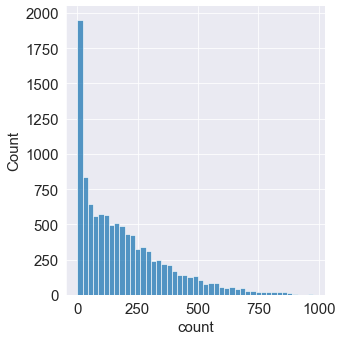

In [17]:
mpl.rc('font' , size = 15) # 폰트 크기를 15로 설정
sns.displot(train['count'])

### x축은 타깃값인 count를 나타내고, y축은 총 개수를 나타낸다. 분포도를 보면 타깃값인 count가 0 근처에 몰려 있다.
### 분포가 왼쪽으로 많이 편향되어 있어 회귀 모델이 좋은 성능을 내려면 데이터가 정규분포를 따라야만 한다.
### 이를 그대로 사용하여 모델링한다면 좋은 성능을 기대하기 어렵다.

### 데이터 분포를 정규분포에 가깝게 만들기 위해 가장 많이 사용되는 방법은 로그변환이다. 로그 변환은 count 분포와 같이 데이터가 왼쪽으로 편향되어 있을 때 사용한다.

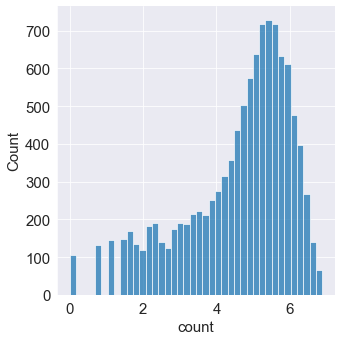

In [18]:
sns.displot(np.log(train['count'])) # 변환 전보다 정규분포에 가까워졌다. 타깃값 분포가 정규분포에 가까울 수록 회귀 모델 성능이 좋다.

## 막대 그래프

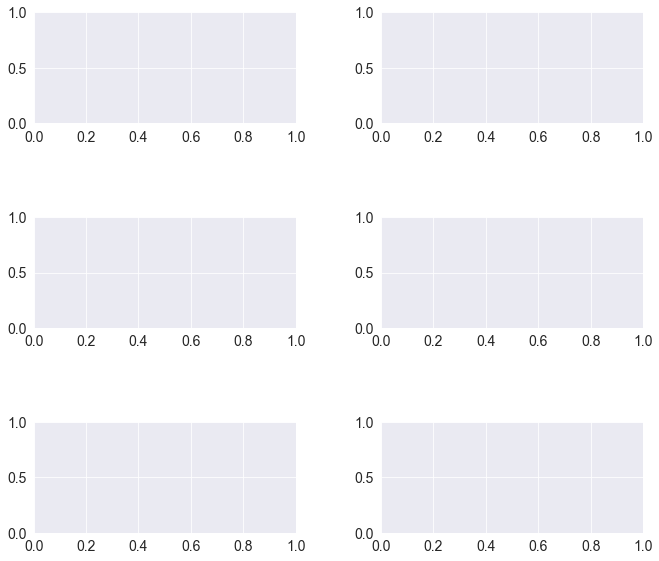

In [19]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize = 15) # 각 축의 제목 크기 설정
figure , axes = plt.subplots(nrows = 3 , ncols= 2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10 , 9) # 전체 Figure 크기를 10x9 인치로 설정

In [20]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E11D6BA370>,
      dtype=object)

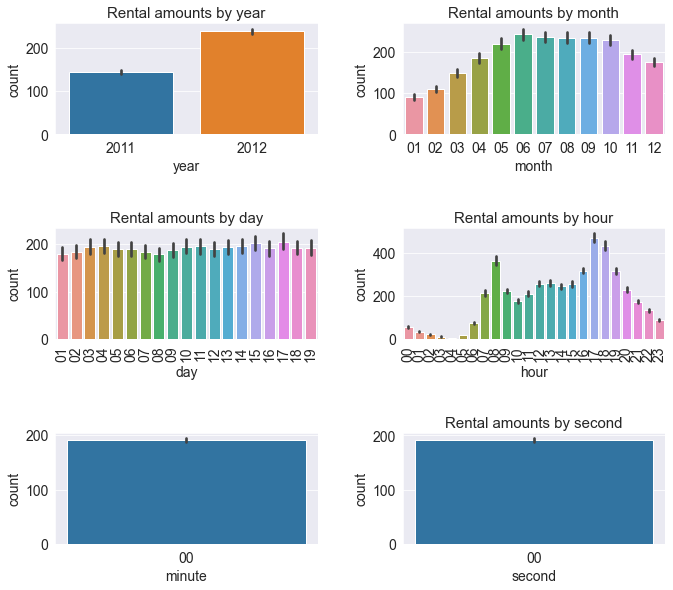

In [21]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize = 15) # 각 축의 제목 크기 설정
figure , axes = plt.subplots(nrows = 3 , ncols= 2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10 , 9) # 전체 Figure 크기를 10x9 인치로 설정

sns.barplot(x='year' , y ='count' , data = train , ax = axes[0,0])
sns.barplot(x='month' , y ='count' , data = train , ax = axes[0,1])
sns.barplot(x='day' , y ='count' , data = train , ax = axes[1,0])
sns.barplot(x='hour' , y ='count' , data = train , ax = axes[1,1])
sns.barplot(x='minute' , y ='count' , data = train , ax = axes[2,0])
sns.barplot(x='second' , y ='count' , data = train , ax = axes[2,1])


axes[0,0].set(title ='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,1].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

axes[1,0].tick_params(axis= 'x' , labelrotation = 90)
axes[1,1].tick_params(axis='x' , labelrotation = 90)
plt.show()

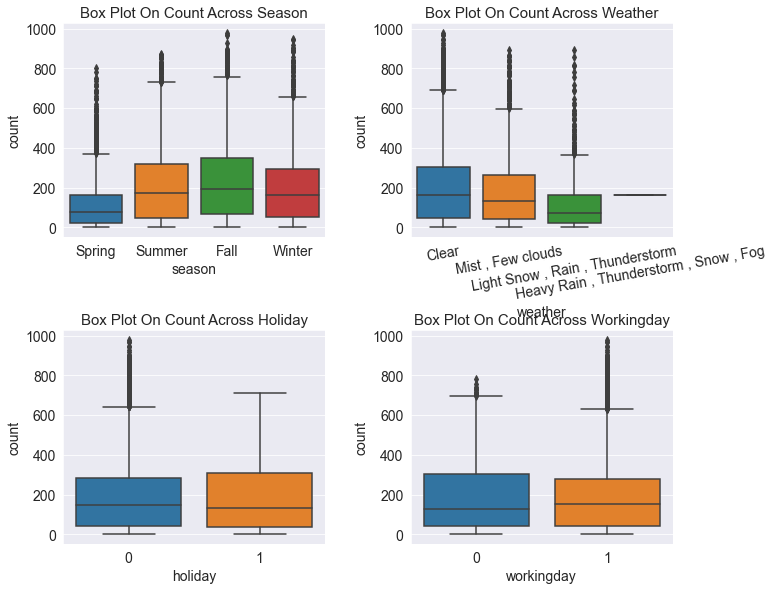

In [22]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize = 15) # 각 축의 제목 크기 설정
figure , axes = plt.subplots(nrows = 2 , ncols= 2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10 , 9) # 전체 Figure 크기를 10x9 인치로 설정

sns.boxplot(x='season' , y ='count' , data = train , ax = axes[0,0])
sns.boxplot(x='weather' , y ='count' , data = train , ax = axes[0,1])
sns.boxplot(x='holiday' , y ='count' , data = train , ax = axes[1,0])
sns.boxplot(x='workingday' , y ='count' , data = train , ax = axes[1,1])



axes[0,0].set(title ='Box Plot On Count Across Season')
axes[0,1].set(title='Box Plot On Count Across Weather')
axes[1,0].set(title='Box Plot On Count Across Holiday')
axes[1,1].set(title='Box Plot On Count Across Workingday')

#
axes[0,1].tick_params(axis= 'x' , labelrotation = 10)

plt.show()

## 포인트 플롯

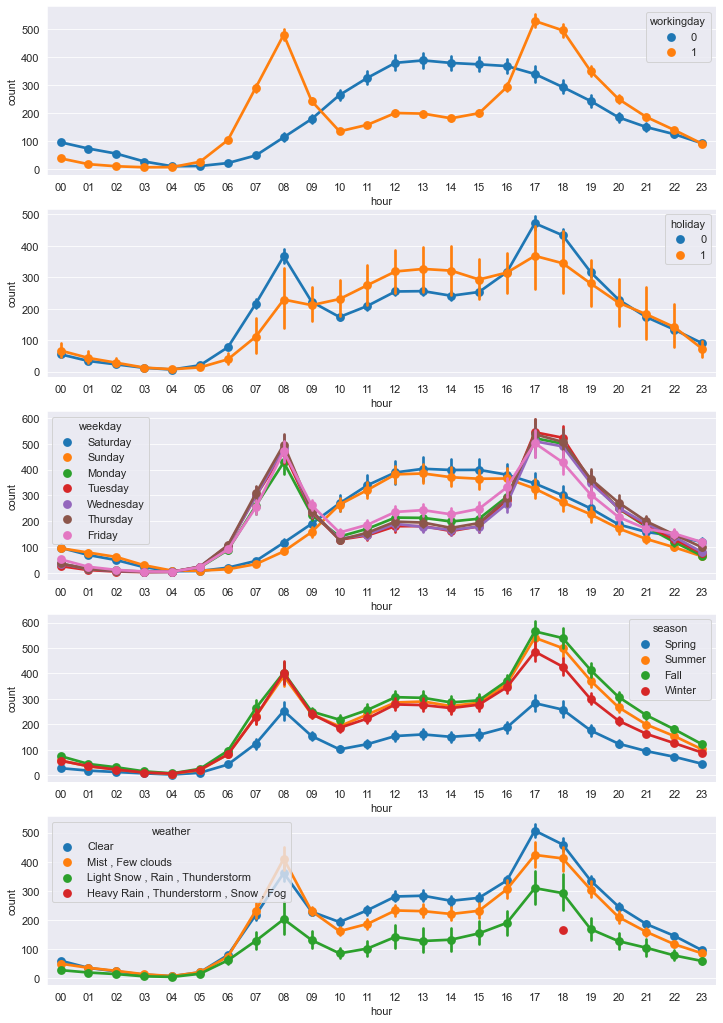

In [23]:
mpl.rc('font'  , size = 11)
figure , axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12,18)

# STEP 2 : 서브플롯 할당
# 근무일 , 공휴일 , 요일 ,계절 , 날씨에 따른 시간대별 평균 대여 수량 포인트플롯

sns.pointplot(x='hour' , y='count' , data = train , hue='workingday' , ax= axes[0]) # hue로 비교하고 싶은 피처 전달
sns.pointplot(x='hour' , y='count' , data = train , hue='holiday' , ax= axes[1])
sns.pointplot(x='hour' , y='count' , data = train , hue='weekday' , ax= axes[2])
sns.pointplot(x='hour' , y='count' , data = train , hue='season' , ax= axes[3])
sns.pointplot(x='hour' , y='count' , data = train , hue='weather' , ax= axes[4])

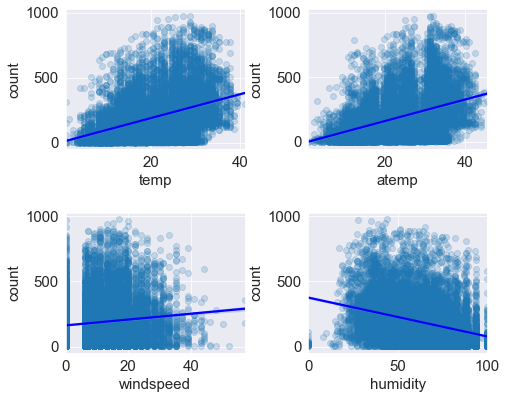

In [24]:
mpl.rc('font' , size = 15)
figure, axes = plt.subplots(nrows = 2 , ncols =2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7,6)

#STEP 2 : 서브플롯 할당
# 온도, 체감온도 , 풍속, 습도 별 대여 수량 산점도 그래프

sns.regplot(x = 'temp' , y='count' , data= train, ax= axes[0,0] , scatter_kws= {'alpha' : 0.2} , line_kws={'color' : 'blue'})

# scatter_kws는 산점도 그래프의 점의 투명도를 조절한다.
sns.regplot(x = 'atemp' , y='count' , data= train, ax= axes[0,1] , scatter_kws= {'alpha' : 0.2} , line_kws={'color' : 'blue'})
sns.regplot(x = 'windspeed' , y='count' , data= train, ax= axes[1,0] , scatter_kws= {'alpha' : 0.2} , line_kws={'color' : 'blue'})
sns.regplot(x = 'humidity' , y='count' , data= train, ax= axes[1,1] , scatter_kws= {'alpha' : 0.2} , line_kws={'color' : 'blue'})


## 히트맵

In [25]:
train[['temp' , 'atemp' , 'humidity' , 'windspeed' , 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

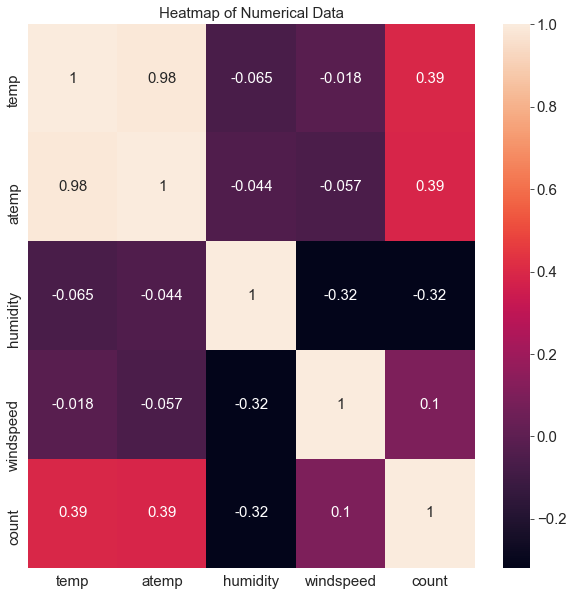

In [26]:
corrMat = train[['temp' , 'atemp' , 'humidity' , 'windspeed' , 'count']].corr()
fig , ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat , annot = True)
ax.set(title = 'Heatmap of Numerical Data')